In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# 입력과 정답 준비
input_data = np.arange(0, np.pi*2, 0.1) # 입력
correct_data = np.sin(input_data)       # 정답
input_data = (input_data-np.pi)/np.pi   # 입력을 -1.0 ~1.0 범위 안으로
n_data = len(correct_data)              # 데이터 수

In [13]:
# 각 설정 값
n_in = 1   # 입력층의 뉴런 수
n_mid = 3  # 은닉층의 뉴런 수
n_out =1   # 출력층의 뉴런 수

wb_width = 0.01 # 가중치와 편향 설정을 위한 정규분포의 표준편차
eta = 0.1       # 학습률
epoch = 2001
interval = 200  # 경과 표시간격

In [14]:
# 은닉층 구현

class MiddleLayer:
    def __init__(self, n_upper, n):
        self.w = wb_width * np.random.randn(n_upper, n)
        self.b = wb_width * np.random.randn(n)
        
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = 1/(1+np.exp(-u)) # 시그모이드 함수
        
    def backward(self, grad_y):
        delta = grad_y * (1-self.y)*self.y # 시그모이드 함수의 미분
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        
        self.grad_x = np.dot(delta, self.w.T)
        
    def update(self, eta):
        self.w -= eta*self.grad_w
        self.b -= eta*self.grad_b

In [15]:
# 출력층 구현
class OutputLayer:
    
    #n_upper -> 이전 레이어의 출력,  n -> 현재 레이어의 출력
    def __init__(self, n_upper, n): # 초기 설정
        self.w = wb_width * np.random.randn(n_upper, n) # 가중치
        self.b = wb_width * np.random.randn(n) # 편향(bias)
        
    def forward(self, x):
        self.x = x 
        u = np.dot(x, self.w) + self.b
        self.y = u # 항등함수
        
    def backward(self, t):
        delta = self.y - t
        
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis =0)
        
        self.grad_x = np.dot(delta, self.w.T)
        
    def update(self, eta):  #가중치와 편향 수정
        self.w -= eta *self.grad_w
        self.b -= eta *self.grad_b

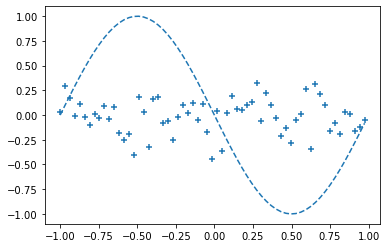

Epoch:0/2001 Error: 0.2818276156469812


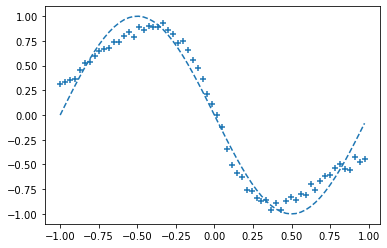

Epoch:200/2001 Error: 0.009541679285406304


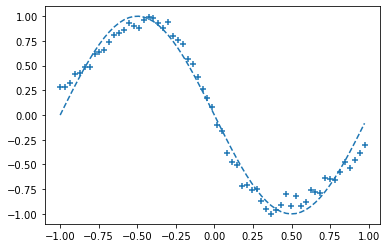

Epoch:400/2001 Error: 0.005641337662074053


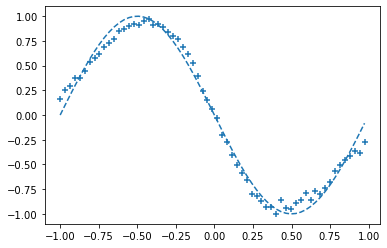

Epoch:600/2001 Error: 0.003380449260704034


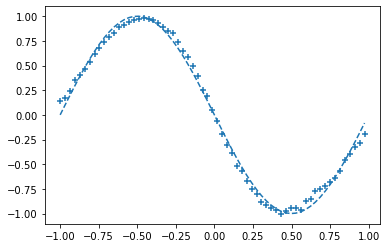

Epoch:800/2001 Error: 0.0014184903889833016


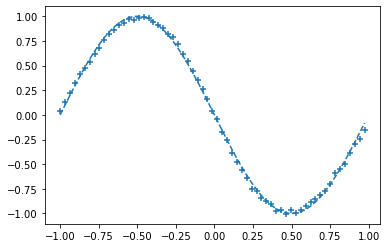

Epoch:1000/2001 Error: 0.00040582049078386384


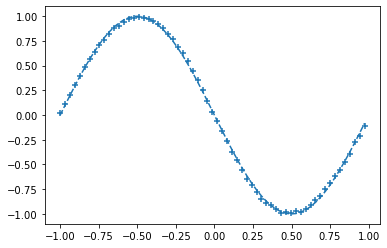

Epoch:1200/2001 Error: 0.00014291031865252936


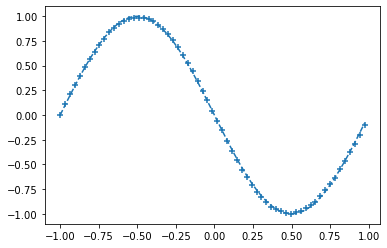

Epoch:1400/2001 Error: 5.960299193416839e-05


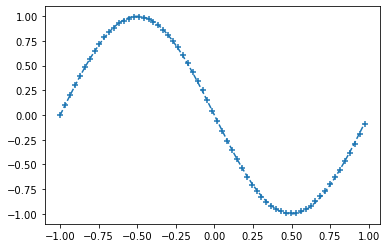

Epoch:1600/2001 Error: 2.8186050731337894e-05


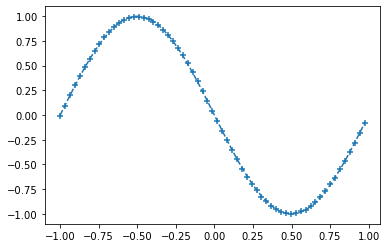

Epoch:1800/2001 Error: 1.4708868948298038e-05


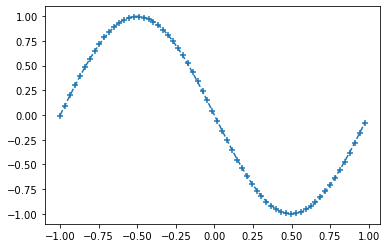

Epoch:2000/2001 Error: 1.1981710880713664e-05


In [18]:
# 역전파 구현

# -- 각 층의 초기화 --
middle_layer = MiddleLayer(n_in, n_mid)
output_layer = OutputLayer(n_mid, n_out)

for i in range(epoch):
    
    # 인덱스 임의로 섞기
    index_random = np.arange(n_data)
    np.random.shuffle(index_random)

    # 결과 표시
    total_error = 0
    plot_x = []
    plot_y = []
    for idx in index_random:
        x = input_data[idx: idx+1]  # 입력
        t = correct_data[idx:idx+1] # 정답
        
        
        #순전파
        middle_layer.forward(x.reshape(1,1))        # 입력을 행렬로 변환
        output_layer.forward(middle_layer.y)
        
        # 역전파
        output_layer.backward(t.reshape(1, 1))      # 정답을 행렬로 변환
        middle_layer.backward(output_layer.grad_x)
        
        # 가중치와 편향 수정
        middle_layer.update(eta)
        output_layer.update(eta)
        
        if i%interval ==0:
            
            y = output_layer.y.reshape(-1)         # 행렬을 벡터로 되돌림
            
            #오차 계산
            total_error += 1.0/2.0*np.sum(np.square(y-t))  # 오차 제곱 합
            
            # 출력 기록
            plot_x.append(x)
            plot_y.append(y)
            
    if i%interval ==0:
        
        #출력 그래프 표시
        plt.plot(input_data, correct_data, linestyle="dashed")
        plt.scatter(plot_x, plot_y, marker="+")
        plt.show()
        
        # 에포크 수와 오차 표시
        print("Epoch:" + str(i) + "/" + str(epoch), "Error: " + str(total_error/n_data))

## 분류 문제 구현

In [20]:
# == 값 ==
X = np.arange(-1.0, 1.1, 0.1)
Y = np.arange(-1.0, 1.1, 0.1)

# -- 입력, 정답 벡터 생성 --
input_data = []
correct_data = []
for x in X :
    for y in Y:
        input_data.append([x, y])
        if y< np.sin(np.pi * x): # y 값이 sin 곡선 아래에 있으면
            correct_data.append([0, 1]) # 아래영역
        else:
            correct_data.append([1, 0]) # 위 영역
            
n_data = len(correct_data)        # 데이터 수

input_data = np.array(input_data)
correct_data = np.array(correct_data)



In [21]:
# -- 각 설정 값 --
n_in = 2     # 입력층 뉴런 수
n_mid = 6    # 은닉층 뉴런 수
n_out = 2    # 출력층 뉴런 수

wb_width = 0.01   # 가중치와 편향 설정을 위한 정규분포 표준편차
eta = 0.1         # 학습 률
epoch = 101
interval = 10     # 경과 표시 간격

In [22]:
# 은닉층 구현

class MiddleLayer:
    def __init__(self, n_upper, n):
        self.w = wb_width * np.random.randn(n_upper, n)
        self.b = wb_width * np.random.randn(n)
        
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = 1/(1+np.exp(-u)) # 시그모이드 함수
        
    def backward(self, grad_y):
        delta = grad_y * (1-self.y)*self.y # 시그모이드 함수의 미분
        
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        
        self.grad_x = np.dot(delta, self.w.T)
        
    def update(self, eta):
        self.w -= eta*self.grad_w
        self.b -= eta*self.grad_b

In [23]:
# 출력층 구현
class OutputLayer:
    
    #n_upper -> 이전 레이어의 출력,  n -> 현재 레이어의 출력
    def __init__(self, n_upper, n): # 초기 설정
        self.w = wb_width * np.random.randn(n_upper, n) # 가중치
        self.b = wb_width * np.random.randn(n) # 편향(bias)
        
    def forward(self, x):
        self.x = x 
        u = np.dot(x, self.w) + self.b
        self.y = np.exp(u)/np.sum(np.exp(u), axis =1, keepdims=True) # 소프트맥스 함수
        
    def backward(self, t):
        delta = self.y - t
        
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis =0)
        
        self.grad_x = np.dot(delta, self.w.T)
        
    def update(self, eta):  #가중치와 편향 수정
        self.w -= eta *self.grad_w
        self.b -= eta *self.grad_b

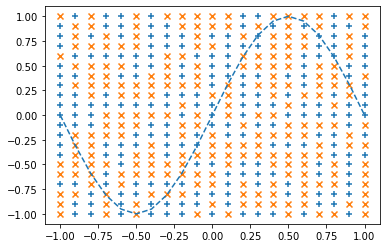

Epoch:0/101 Error: -0.7177322961453843


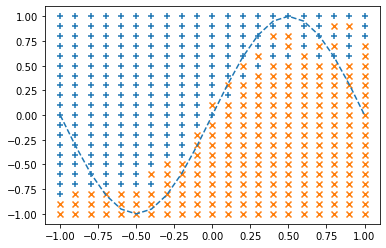

Epoch:10/101 Error: -0.2871622358535498


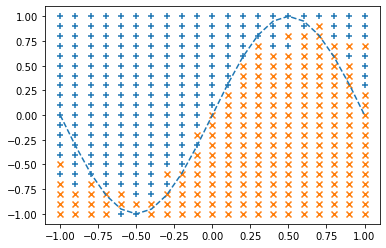

Epoch:20/101 Error: -0.2098003756822571


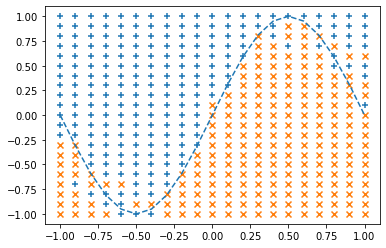

Epoch:30/101 Error: -0.16111980695574218


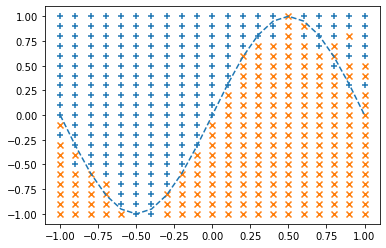

Epoch:40/101 Error: -0.14417542759248922


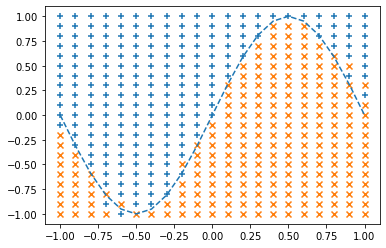

Epoch:50/101 Error: -0.11451451627097571


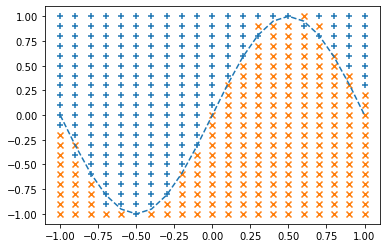

Epoch:60/101 Error: -0.09562489358012062


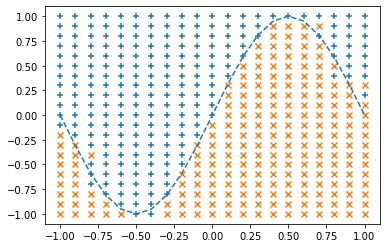

Epoch:70/101 Error: -0.07859807809233041


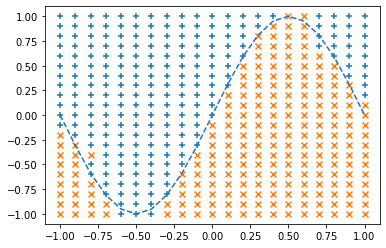

Epoch:80/101 Error: -0.07568030418196244


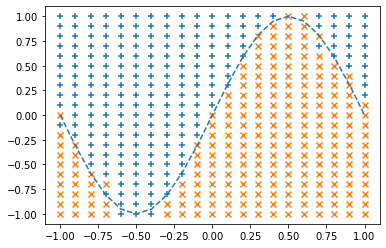

Epoch:90/101 Error: -0.07726508211605229


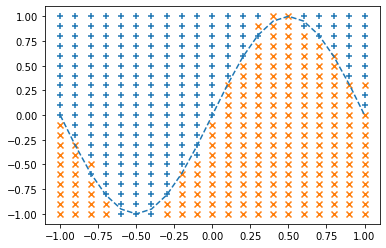

Epoch:100/101 Error: -0.06861816650992437


In [25]:
# 역전파 구현

# -- 각 층의 초기화 --
middle_layer = MiddleLayer(n_in, n_mid)
output_layer = OutputLayer(n_mid, n_out)

# -- 학습 --
sin_data = np.sin(np.pi * X) # 결과 검증용

for i in range(epoch):
    
    # 인덱스 임의로 섞기
    index_random = np.arange(n_data)
    np.random.shuffle(index_random)

    # 결과 표시
    total_error = 0
    x_1 = []
    y_1 = []
    x_2 = []
    y_2 = []
    
    for idx in index_random:
        x = input_data[idx]  # 입력
        t = correct_data[idx] # 정답
        
        
        #순전파
        middle_layer.forward(x.reshape(1, 2))        # 입력을 행렬로 변환
        output_layer.forward(middle_layer.y)
        
        # 역전파
        output_layer.backward(t.reshape(1, 2))      # 정답을 행렬로 변환
        middle_layer.backward(output_layer.grad_x)
        
        # 가중치와 편향 수정
        middle_layer.update(eta)
        output_layer.update(eta)
        
        if i%interval ==0:
            
            y = output_layer.y.reshape(-1)         # 행렬을 벡터로 되돌림
            
            #오차 계산
            total_error += np.sum(t * np.log(y + 1e-7)) # 교차 엔트로피 오차
            
            # 확률 크기를 비교하여 분류
            if y[0] > y[1] :
                x_1.append(x[0])
                y_1.append(x[1])
            else :
                x_2.append(x[0])
                y_2.append(x[1])
            
    if i%interval ==0:
        
        #출력 그래프 표시
        plt.plot(X, sin_data, linestyle="dashed")
        plt.scatter(x_1, y_1, marker="+")
        plt.scatter(x_2, y_2, marker="x")
        plt.show()
        
        # 에포크 수와 오차 표시
        print("Epoch:" + str(i) + "/" + str(epoch), "Error: " + str(total_error/n_data))